In [10]:
from dtaidistance import dtw
import numpy as np
from numpy import inf


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from dtaidistance import clustering
import sklearn
from sklearn import cluster

# df = pd.read_csv("Data_for_clustering.csv", header=0) # header=0 is default

df = pd.read_excel('Data_for_clustering.xlsx', header=0)
df = df.drop(['Date'], axis=1)

head = list(df.columns.values) # get machine names
print("head", head) # print machine names

df = df.T # transpose the data
df = df.values

ds = dtw.distance_matrix_fast(df) # get dist matrix
ds[ds == inf] = 0 # replace all infinity vals in the dist matrix with 0.

pd.DataFrame(ds).to_excel("ds.xlsx") # save dist matrix to a xlsx.

# clustering starts
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})

cluster_idx = model3.fit(df)

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
model3.plot("hierarchy.png", axes=ax, show_ts_label=head,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)


head ['Cell 1', 'Cell 2', 'Cell 4 z1', 'Cell 4 z2', 'Cell 5 z1', 'Cell 5 z2', 'Cell 6 z1', 'Cell 6 z2', 'Cell 7 z1', 'Cell 7 z2']


(None, None)

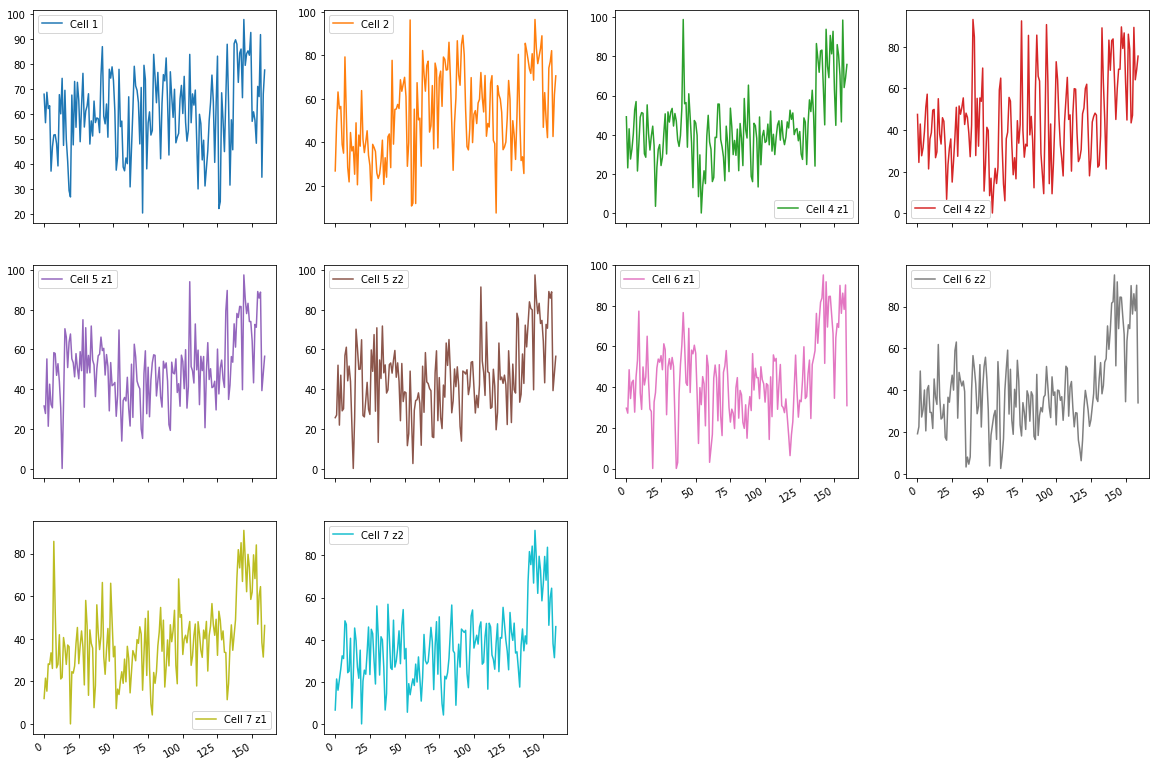

In [30]:
dst = pd.read_excel('Data_for_clustering.xlsx', header=0)
dst = dst.drop(['Date'], axis=1)
dst.plot(kind='line', subplots=True, layout=(4,4), figsize=(20,20))
plt.savefig('line')

In [17]:
# to find number of clusters
NumberOfClusters=range(2,30)
silhouette_score_values=list()

for i in NumberOfClusters:
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(ds)
    labels= classifier.predict(ds)
    print("Number Of Clusters:", i)
    print ("Silhouette score value", sklearn.metrics.silhouette_score(ds,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(ds,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of clusters is:", Optimal_NumberOf_Components)

Number Of Clusters: 2
Number Of Clusters: 3
Number Of Clusters: 4
Number Of Clusters: 5
Number Of Clusters: 6
Number Of Clusters: 7
Number Of Clusters: 8
Number Of Clusters: 9
Number Of Clusters: 10


ValueError: Number of labels is 10. Valid values are 2 to n_samples - 1 (inclusive)

In [65]:
from scipy.cluster.hierarchy import fclusterdata
max_d = 50
clusters = fclusterdata(ds, t=1)
clusters

array([ 7, 11,  4,  4,  5,  5,  5,  5,  8,  6,  3,  3, 10,  1,  2,  1,  2,
        2,  2,  2,  9,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2], dtype=int32)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices